<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> MAC0209 - Modelagem e Simulação</a> </font>

Roberto M. Cesar Jr. (IME-USP)

Roberto Hirata Jr. (IME-USP)
***
<font size="5"> Movimento 2D usando Sistemas dinâmicos, State Vectors e State Space</font>
***

# Introdução: modelagem por sistemas dinâmicos e vetores de estado

Equações diferenciais do movimento:

$$\frac{d^2\vec{x}}{dt^2} = \frac{d\vec{v}}{dt} = \vec{a}(t)$$

$$\frac{d\vec{x}}{dt} = \vec{v}(t)$$

Euler:

$$\vec{x}(t+\Delta t) = \vec{x}(t) + \vec{v}(t) \; \Delta t $$

$$\vec{v}(t+\Delta t) = \vec{v}(t) + \vec{a}(t) \; \Delta t $$

Assim, o movimento 2D da partícula pode ser representado pelo vetor de estados

$\vec{s} = (\vec{x},\vec{v}) = ([x_1, x_2], [v_1, v_2])$



In [ ]:
# funcoes genericas que podem ser re-usadas em outros problemas

import math
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


# funcoes base para implementar o Euler.
# Deve-se implementar a funcao rates, que depende de cada modelo.

def initStateVector(s):
  return(np.array(s))

def updateStateVectorEuler(s,dt):
  return(s + rates(s,dt))

# State Vector Trajectories store state space evolution. Uses list to init empty.

def initSVTrajectory():
  return([])

# append s a svt
def updateSVTrajectory(svt,s):
    svt.append(s)
    return(svt)

def extractSVTrajectory(svt,i): # returns the trajectory as numpy array
    foo = np.array(svt)
    return(foo[:,i])

def plotCompareAnalyticalEuler(vxa, vva, vxe, vve, vtime):

    fig, ax = pyplot.subplots()
    pyplot.plot(vtime, vxe, label='Euler',linestyle='',marker='o')
    pyplot.plot(vtime, vxa, label='Analytical')
    pyplot.title('Posição')
    ax.set_xlabel('Tempo (segundos)')
    ax.set_ylabel('Posição (metros)')
    pyplot.show(block=False)

    fig, ax = pyplot.subplots()
    pyplot.plot(vtime, vve,label='Euler',linestyle='',marker='o')
    pyplot.plot(vtime, vva,label='Analytical')
    pyplot.title('Velocidade')
    ax.set_xlabel('Tempo (segundos)')
    ax.set_ylabel('Velocidade (metros / segundo)')
    pyplot.show()

    fig, ax = pyplot.subplots()
    pyplot.plot(vxe, vve,label='Euler',linestyle='',marker='o')
    pyplot.plot(vxa, vva,label='Analytical')
    pyplot.title('Dynamical System Trajectory')
    ax.set_xlabel('Posição (metros)')
    ax.set_ylabel('Velocidade (metros / segundo)')
    pyplot.show()


def erroTrajetorias(v1,v2,tipoErro):
    if (tipoErro == 0): # erro com sinal
        return(np.array(v1) - np.array(v2))
    elif (tipoErro == 1): # erro quadratico
        return((np.array(v1) - np.array(v2))**2)
    elif (tipoErro == 2): # erro em modulo
        return(fabs((np.array(v1) - np.array(v2))))


def easyPlot(v,title):
  pyplot.figure()
  pyplot.plot(v)
  pyplot.title(title)
  pyplot.show()

def easyPlot2D(x,y,title):
  pyplot.figure()
  pyplot.plot(x,y,'*')
  pyplot.title(title)
  pyplot.show()

def easyPlot3D(x,y,z,title,xl,yl,zl):
  mpl.rcParams['legend.fontsize'] = 10
  fig = pyplot.figure()
  ax = fig.gca(projection='3d')
  ax.plot(x, y, z, label=title)
  ax.set_xlabel(xl)
  ax.set_ylabel(yl)
  ax.set_zlabel(zl)
  ax.legend()
  pyplot.show()


## Exercício: $\frac{d^2\vec{x}}{dt^2} = \vec{a}(t)$

Escreva a solução para as EDOs:

$\frac{d^2x_0}{dt^2} = \sin (k_0 \pi t)$

$\frac{d^2x_1}{dt^2} = \cos (k_1 \pi t)$




### Exercício: Resolva na célula abaixo antes de olhar a solução

O programa abaixo implementa a solucão desse problema **com** a modelagem por sistemas dinâmicos e vetores de estado.

In [ ]:
# Escreva sua solucao aqui.

### Resolução: Compare sua solução

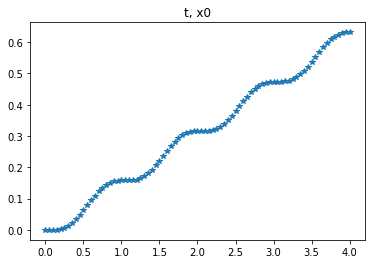

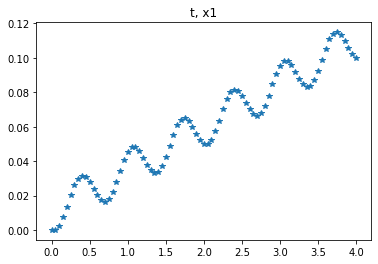

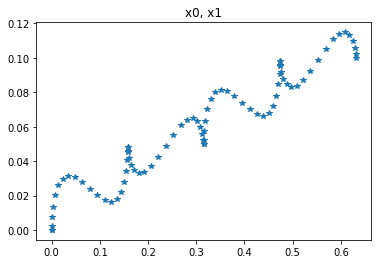

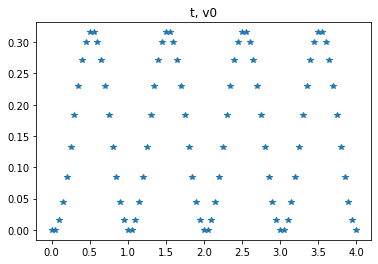

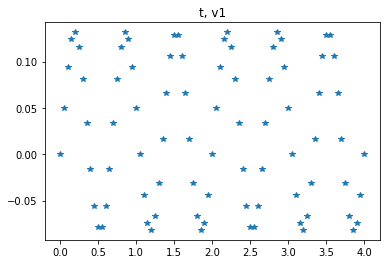

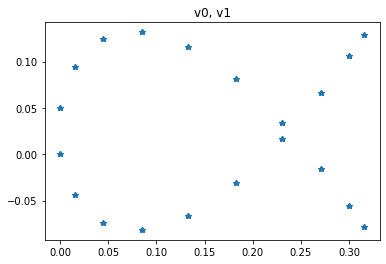

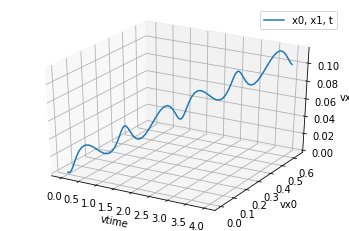

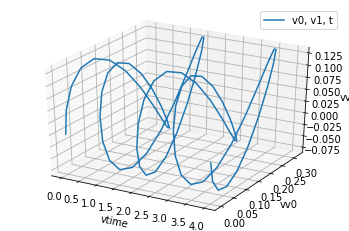

In [ ]:
# Implementa o exercício da integração de Euler de
# compara com o resultado analítico

# Euler:
def rates(s,dt):
  k0 = 2
  k1 = 3
  r0 = s[2] * dt
  r1 = s[3] * dt
  r2 = math.sin(k0 * math.pi * s[4]) * dt
  r3 = math.cos(k1 * math.pi * s[4]) * dt
  r4 = dt
  return(np.array([r0,r1,r2,r3,r4]))

def main():
    t=0
    tf = 4
    dt=0.05
    x0=0
    x1=0
    v0=0
    v1=0

    # state vector: [position x, velocity v, time t]
    stateVectorEuler = initStateVector([x0,x1,v0,v1,t])

    svtEuler = initSVTrajectory()

    while (stateVectorEuler[4]<tf):
      svtvEuler = updateSVTrajectory(svtEuler,list(stateVectorEuler))
      stateVectorEuler=updateStateVectorEuler(stateVectorEuler,dt)

    vx0 = extractSVTrajectory(svtEuler,0)
    vx1 = extractSVTrajectory(svtEuler,1)
    vv0 = extractSVTrajectory(svtEuler,2)
    vv1 = extractSVTrajectory(svtEuler,3)

    vtime = extractSVTrajectory(svtEuler,4)

    easyPlot2D(vtime, vx0, 't, x0')
    easyPlot2D(vtime, vx1, 't, x1')
    easyPlot2D(vx0, vx1, 'x0, x1')

    easyPlot2D(vtime, vv0, 't, v0')
    easyPlot2D(vtime, vv1, 't, v1')
    easyPlot2D(vv0, vv1, 'v0, v1')

    easyPlot3D(vtime, vx0, vx1, 'x0, x1, t', 'vtime', 'vx0', 'vx1')
    easyPlot3D(vtime, vv0, vv1, 'v0, v1, t', 'vtime', 'vv0', 'vv1')


main()